In [6]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

from matplotlib import rcParams
rcParams['figure.figsize'] = 13, 6 
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] =False
%config InlineBackend.figure_format = 'retina'


print(tf.__version__)

mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

2.15.0
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Loading data

(28, 28)


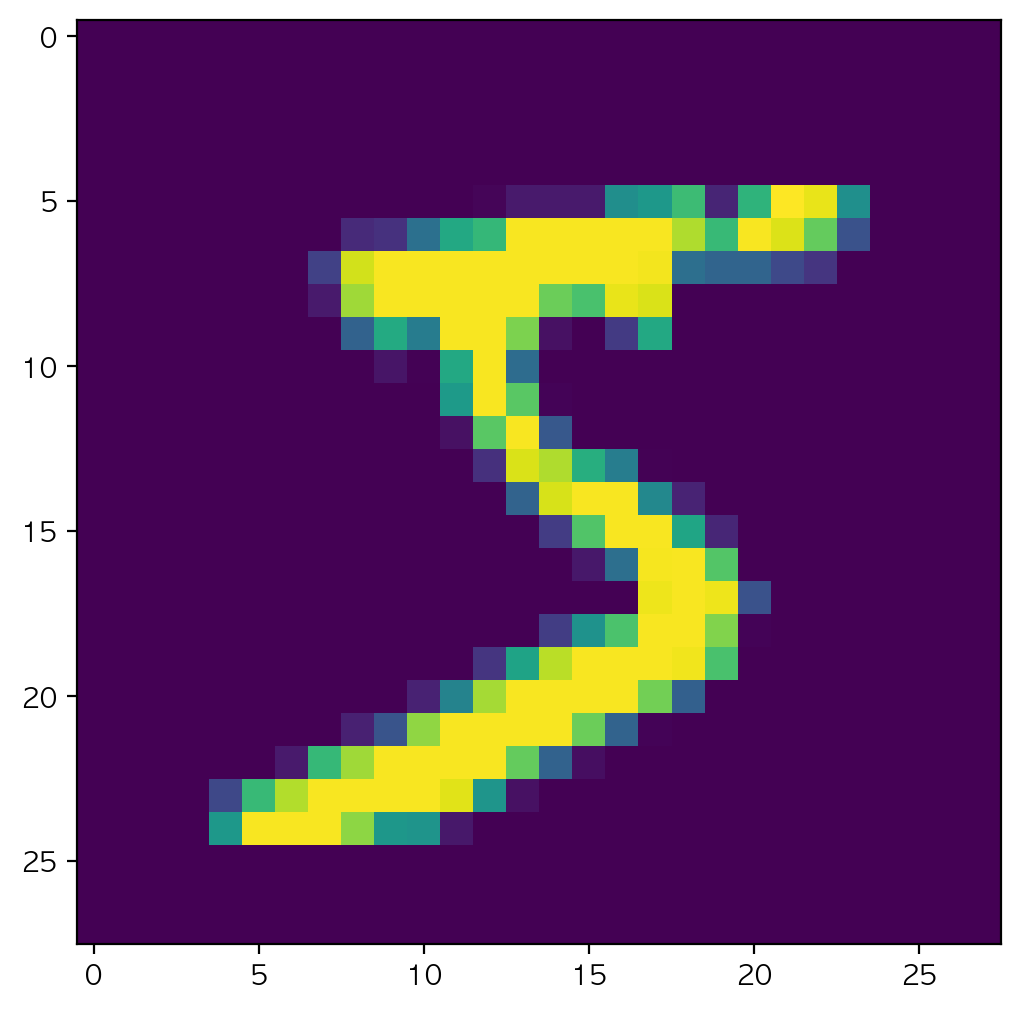

In [8]:
# Display the first image in the training data and size of the image
print(x_train[0].shape)
plt.figure()
plt.imshow(x_train[0])

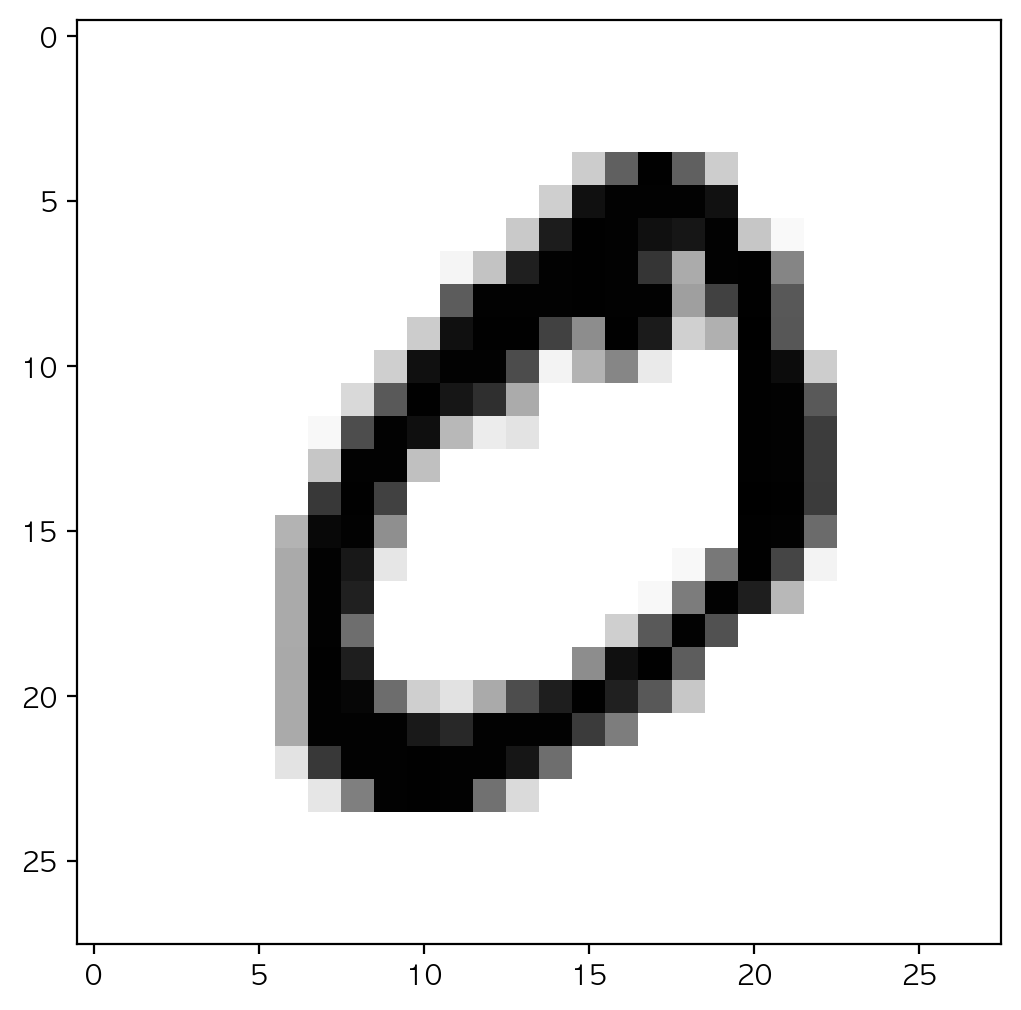

In [9]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [11]:
print(y_train[1])

0


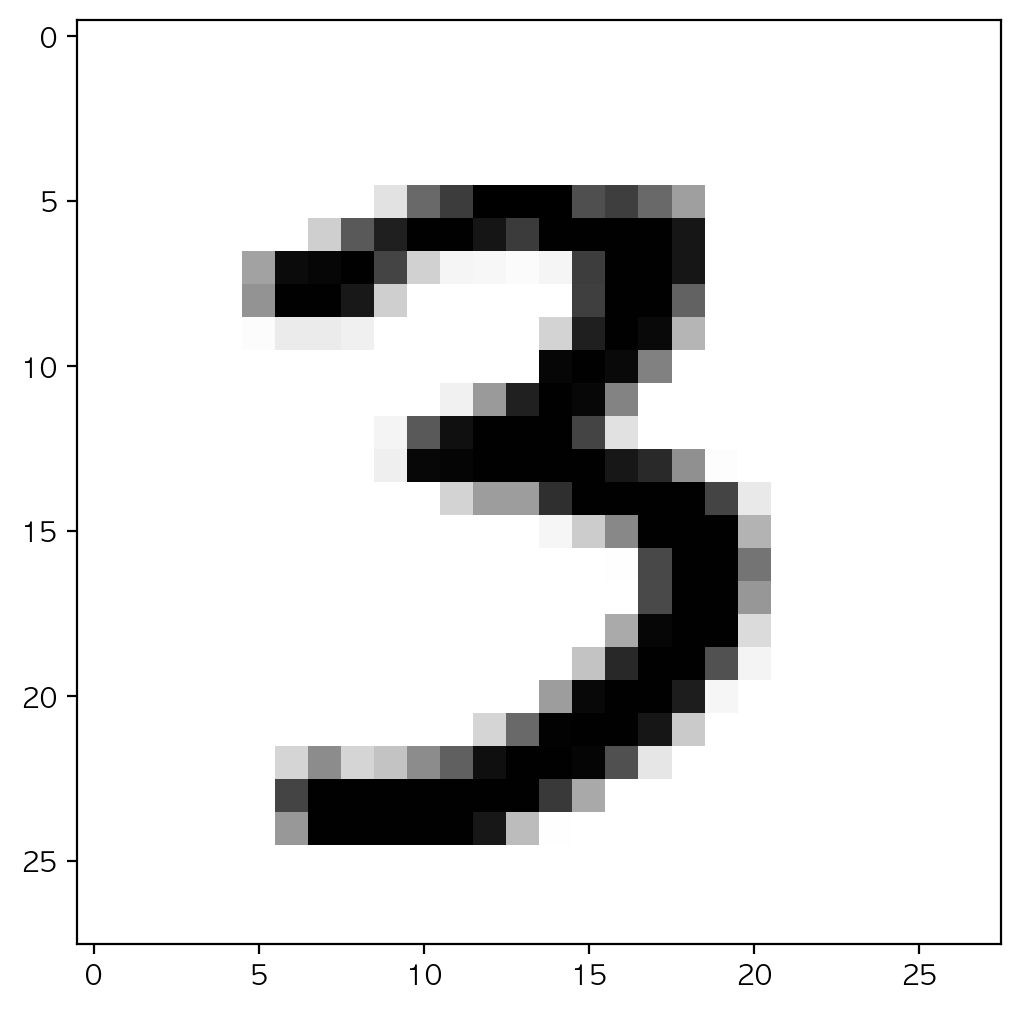

10001 번째 이미지의 숫자는 바로  3 입니다.


In [12]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000     
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [13]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


In [14]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## Desing deep learning network

In [15]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

2024-03-06 10:46:10.834062: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-03-06 10:46:10.834087: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 64.00 GB
2024-03-06 10:46:10.834095: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 24.00 GB
2024-03-06 10:46:10.834155: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-06 10:46:10.834350: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model에 추가된 Layer 개수:  7


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 32)                2

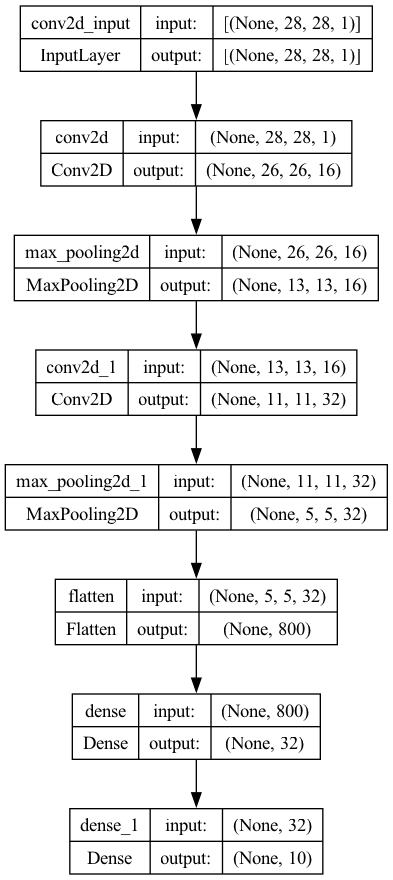

In [17]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

## Training 

In [18]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [19]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10


2024-03-06 10:54:36.033132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 8ms/step - loss: 0.2241 - accuracy: 0.9299
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0820 - accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0739 - accuracy: 0.9787
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0707 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0853 - accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1327 - accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2708 - accuracy: 0.9748
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4273 - accuracy: 0.9744
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.8318 - accuracy: 0.9726
Epoch 10/10
1875/1875 [==============================] - 14s 8ms/step - loss: 1.3280

## Performance

In [20]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 2s - loss: 1.1074 - accuracy: 0.9780 - 2s/epoch - 5ms/step
test_loss: 1.107445240020752
test_accuracy: 0.9779999852180481


In [35]:
history = model.fit(
    x_train_reshaped, 
    y_train, 
    validation_data=(x_test_reshaped, y_test),
    epochs=10
)

Epoch 1/10
1875/1875 [==============================] - 16s 9ms/step - loss: 4.9428 - accuracy: 0.9707 - val_loss: 5.9133 - val_accuracy: 0.9722
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 6.1574 - accuracy: 0.9720 - val_loss: 8.1359 - val_accuracy: 0.9713
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 9.5364 - accuracy: 0.9695 - val_loss: 8.9637 - val_accuracy: 0.9739
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 12.2990 - accuracy: 0.9696 - val_loss: 16.8795 - val_accuracy: 0.9639
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 15.2618 - accuracy: 0.9697 - val_loss: 19.2281 - val_accuracy: 0.9703
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 20.5591 - accuracy: 0.9683 - val_loss: 27.2721 - val_accuracy: 0.9666
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 25.9421 - accuracy: 0.9687 - val_loss: 28.7234 

In [36]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


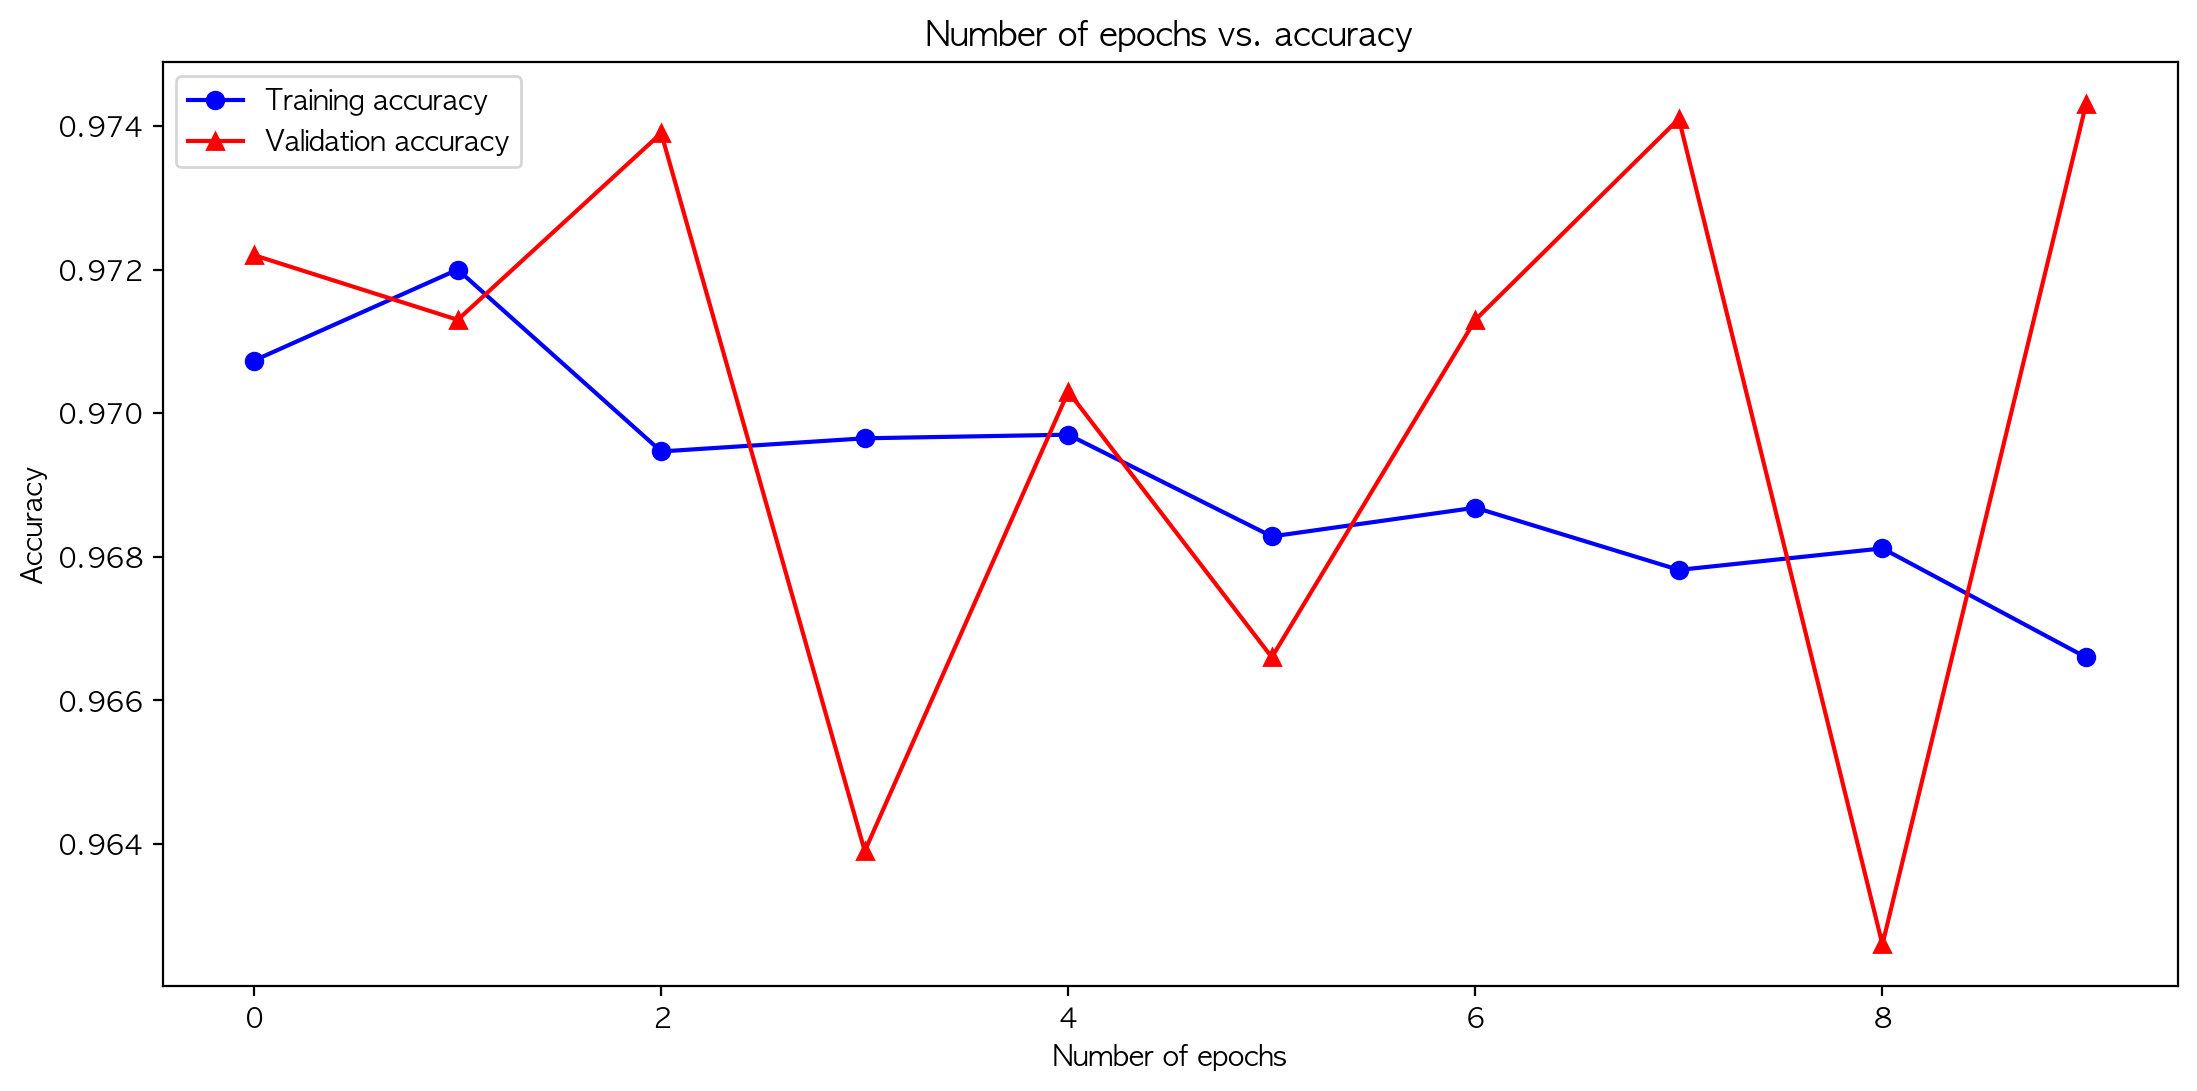

In [38]:
epochs = 10  # number of epochs
epochs_ = range(0, epochs)    
accuracy_train = history.history['accuracy']  ##getting  accuracy of each epochs
accuracy_val = history.history['val_accuracy']  ##getting validation accuracy of each epochs

plt.plot(epochs_, accuracy_train, label='Training accuracy', color='blue', marker = 'o')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

plt.plot(epochs_, accuracy_val, label = "Validation accuracy", color='red', marker = '^')
plt.title("Number of epochs vs. accuracy")
plt.legend()

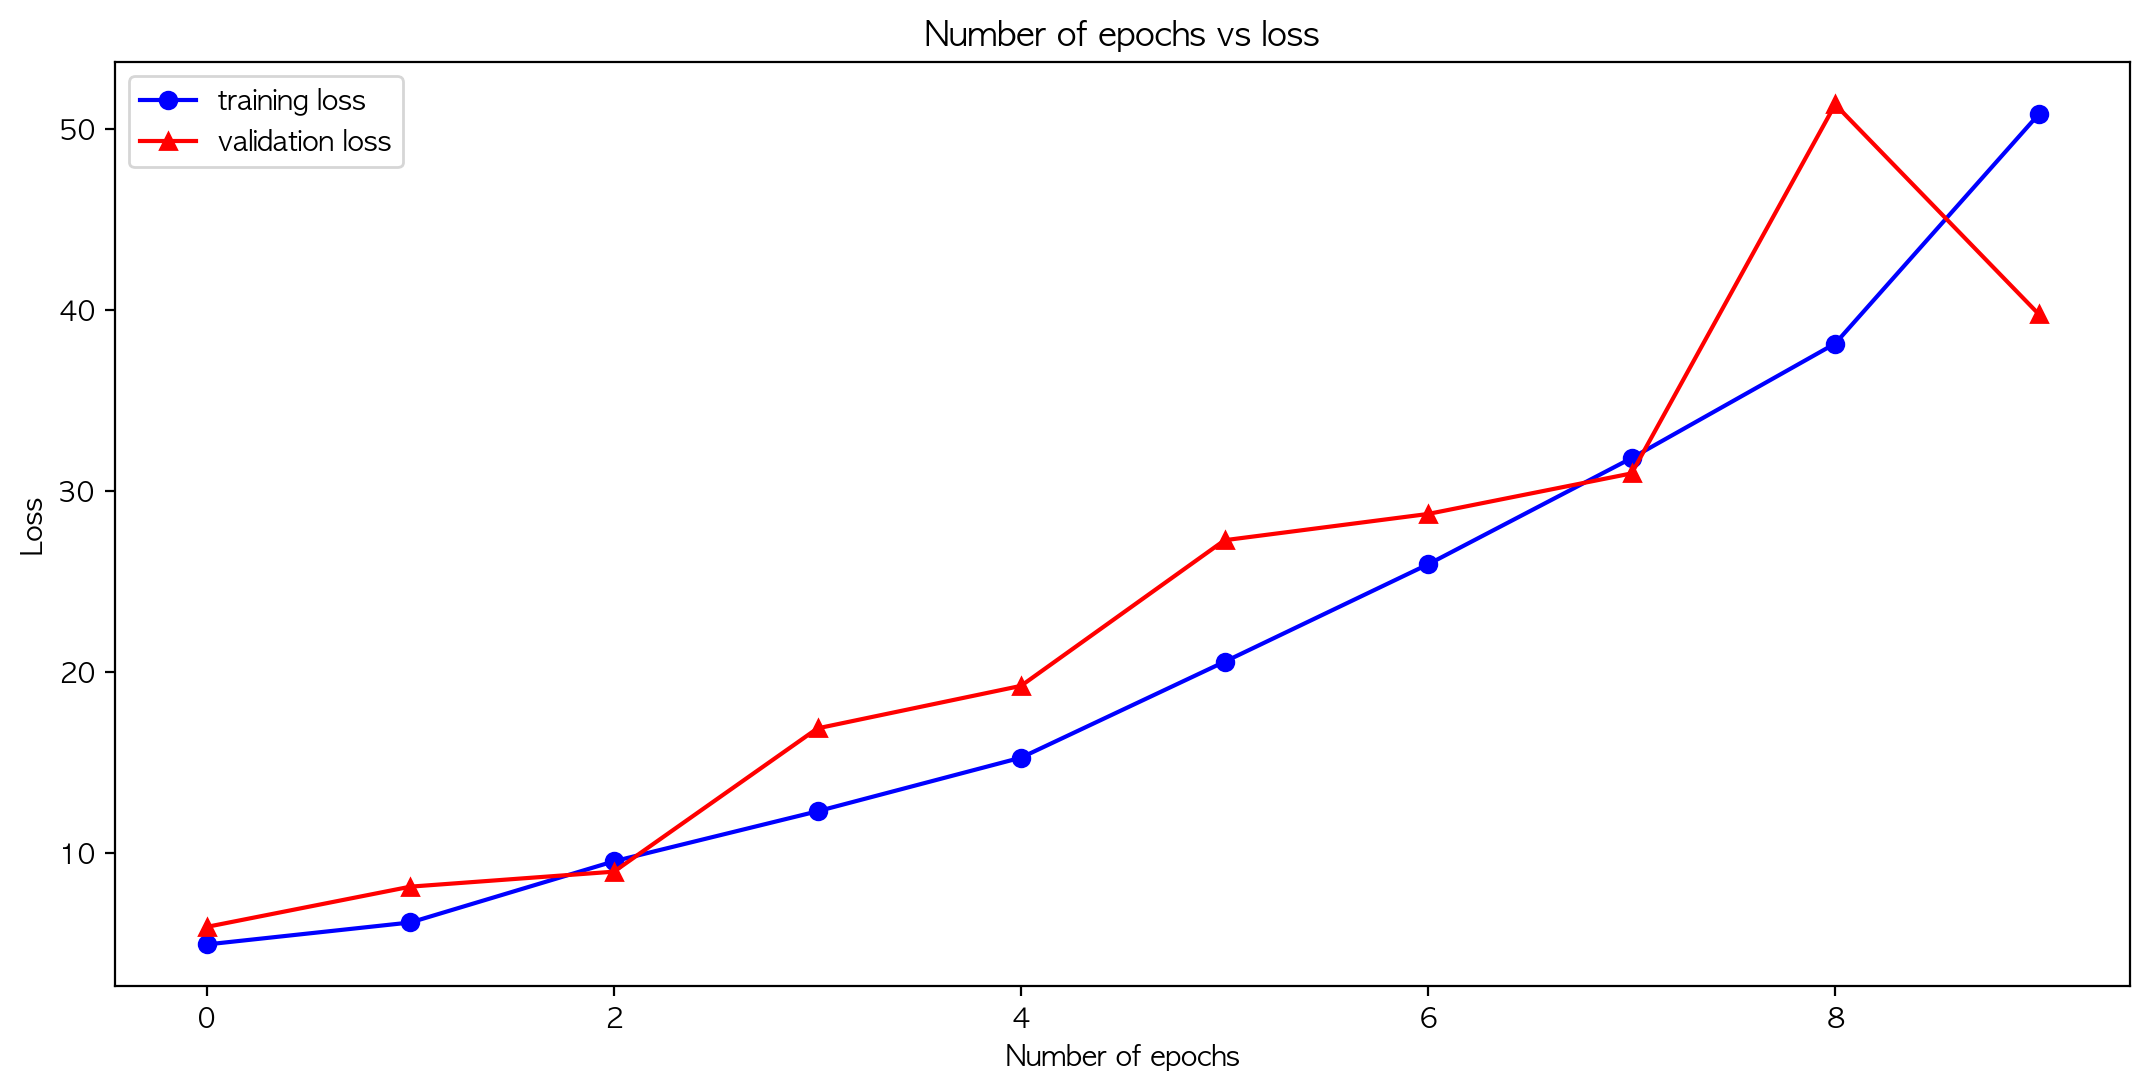

In [40]:
epochs = 10  # number of epochs
epochs_ = range(0, epochs)    
loss_train = history.history['loss']    ##getting  loss of each epochs
loss_val = history.history['val_loss']  ## getting validation loss of each epochs

plt.plot(epochs_, loss_train, label='training loss', color='blue', marker = 'o')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

plt.plot(epochs_, loss_val, label="validation loss", color='red', marker = '^')
plt.title('Number of epochs vs loss')
plt.legend()

In [29]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=1  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 [==============================] - 1s 2ms/step
model.predict() 결과 :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  2


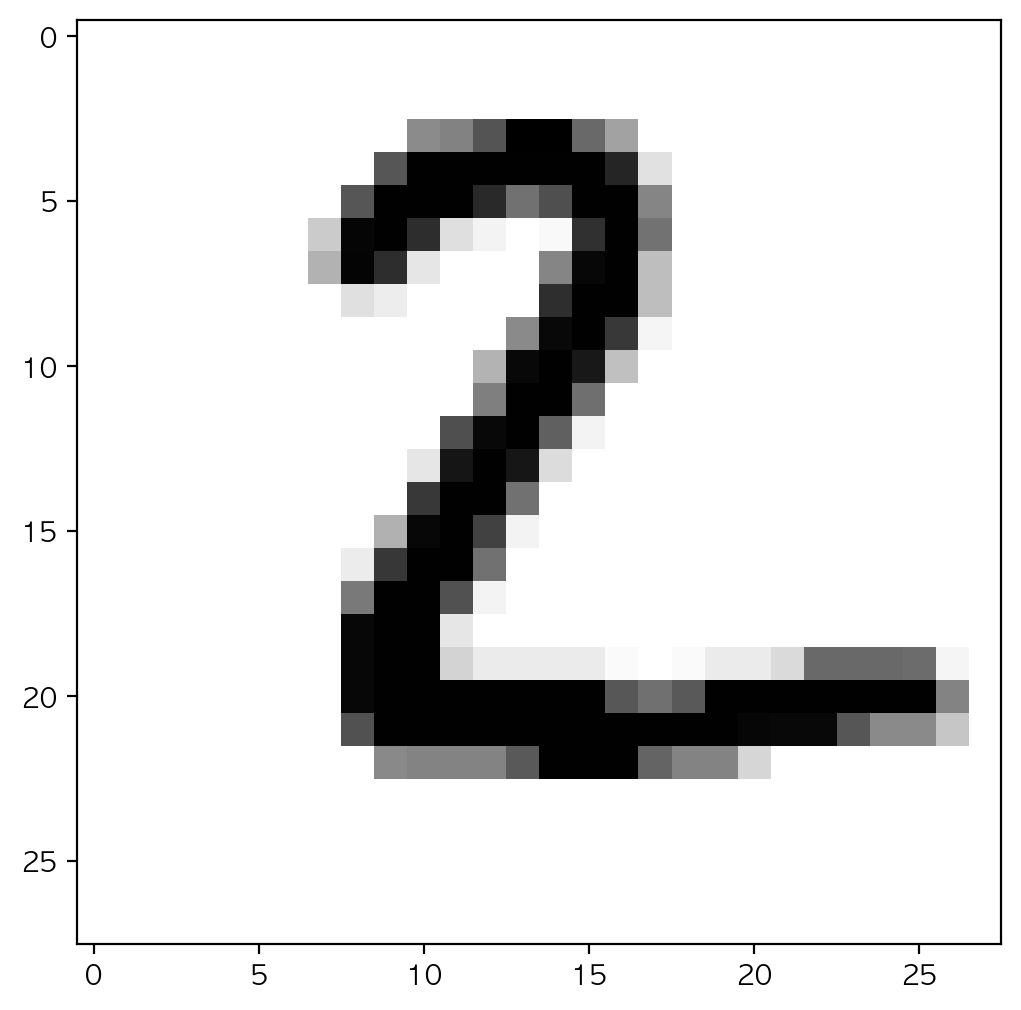

In [30]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
라벨: 9, 예측결과: 4


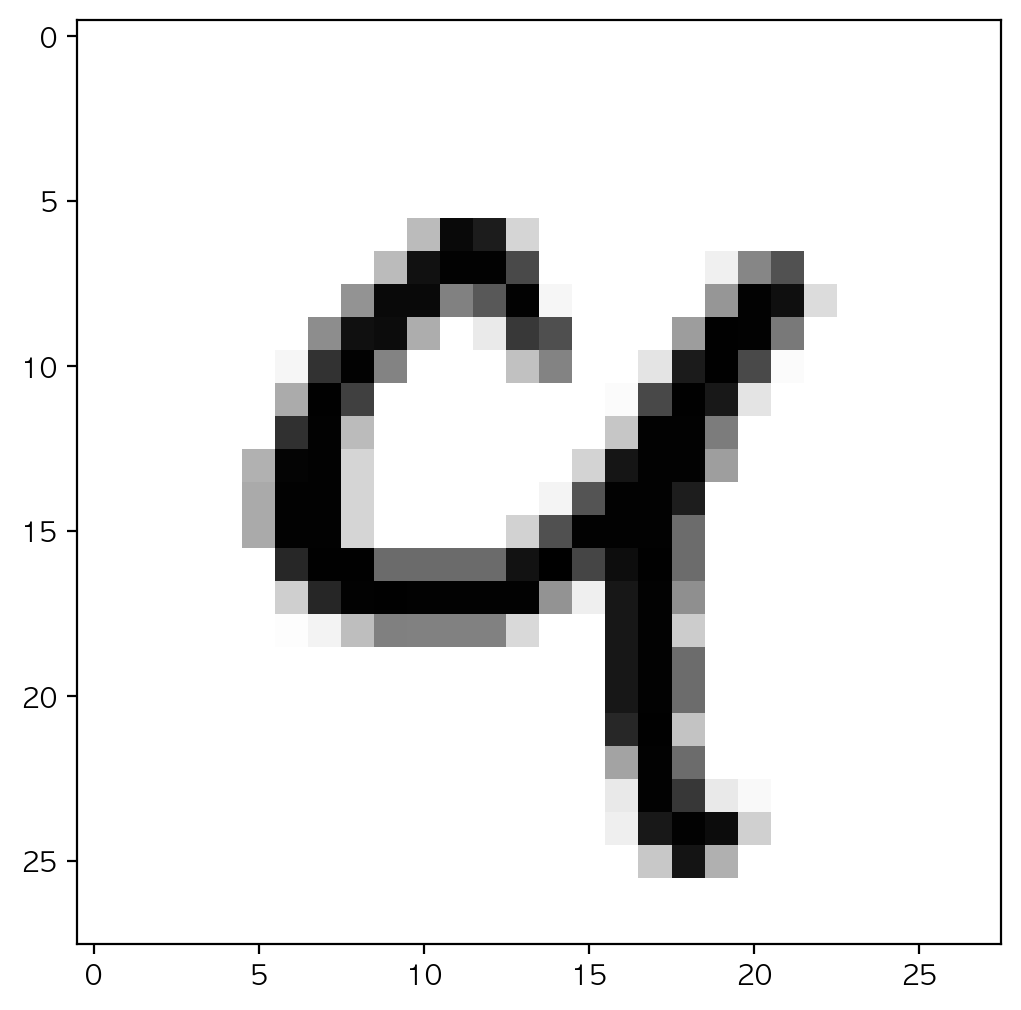

예측확률분포: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
라벨: 7, 예측결과: 2


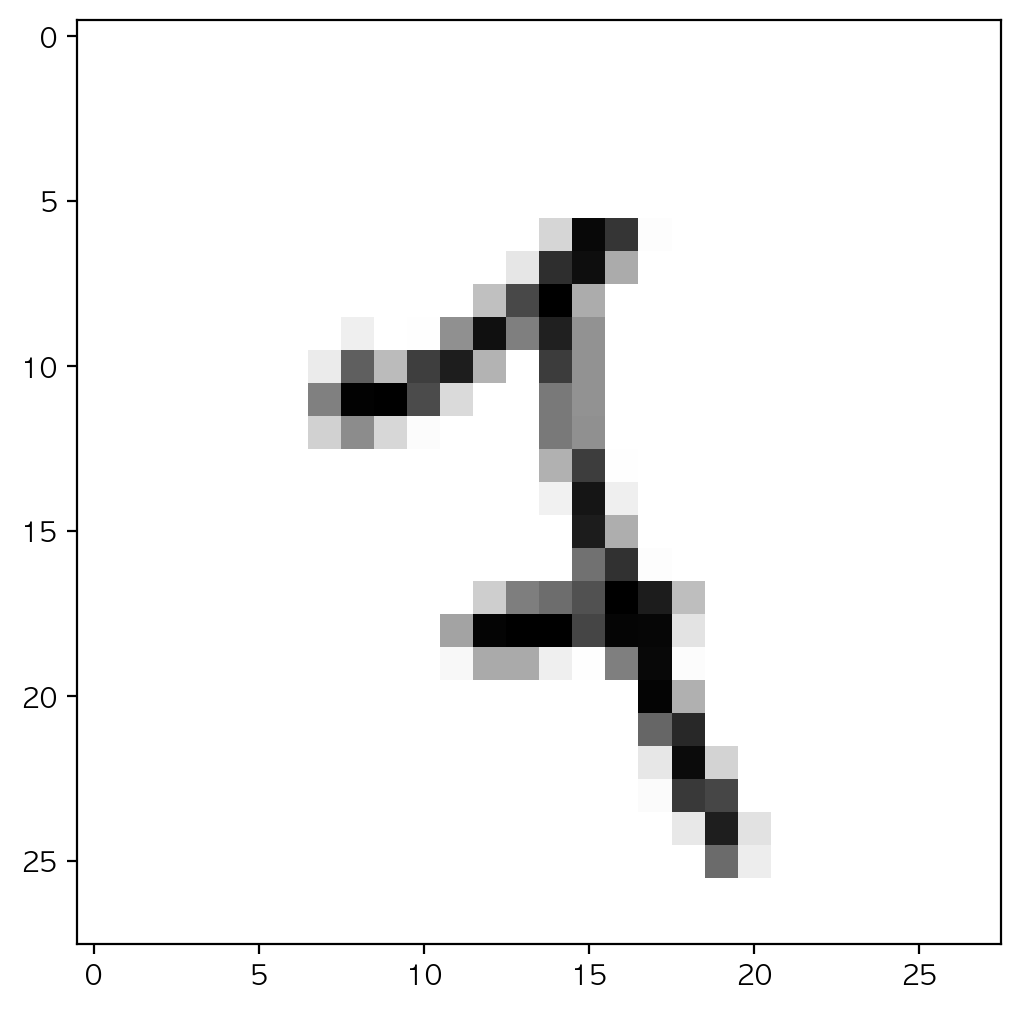

예측확률분포: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
라벨: 3, 예측결과: 5


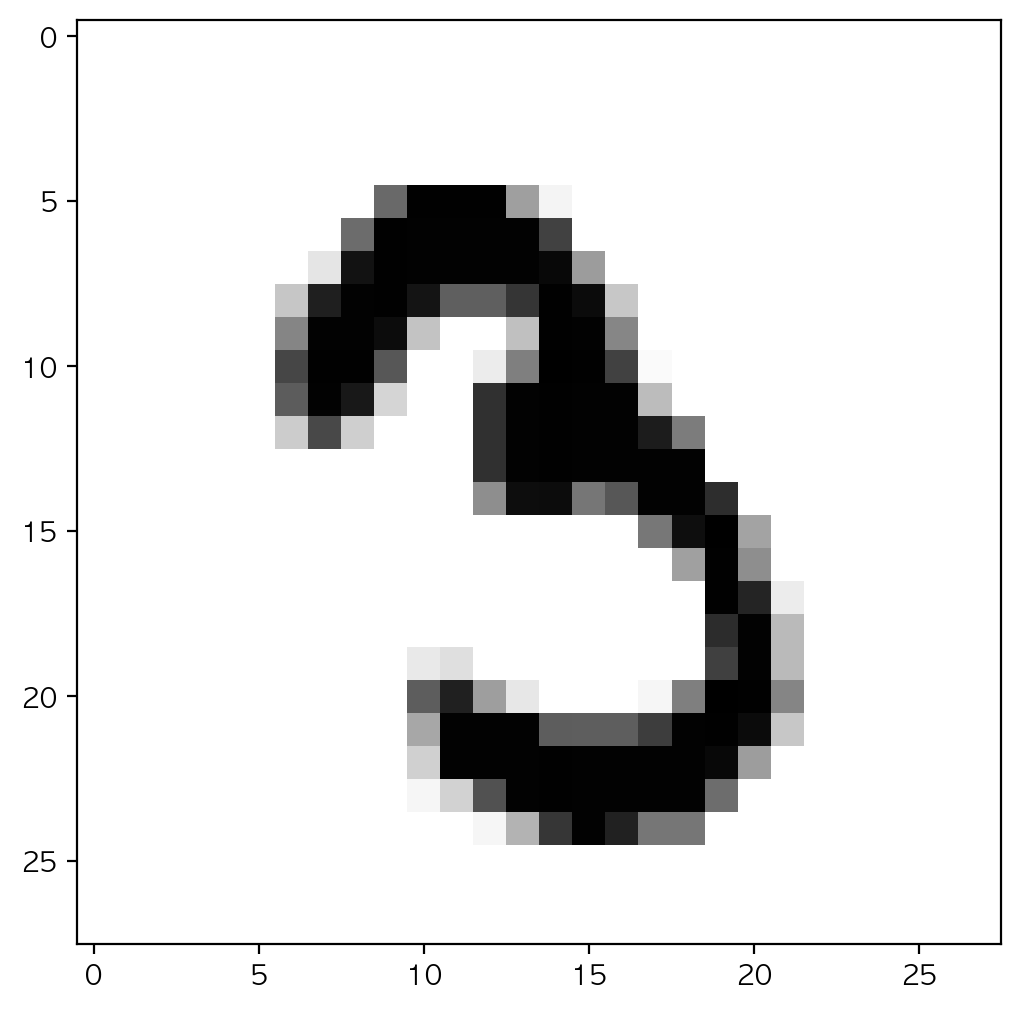

예측확률분포: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
라벨: 7, 예측결과: 8


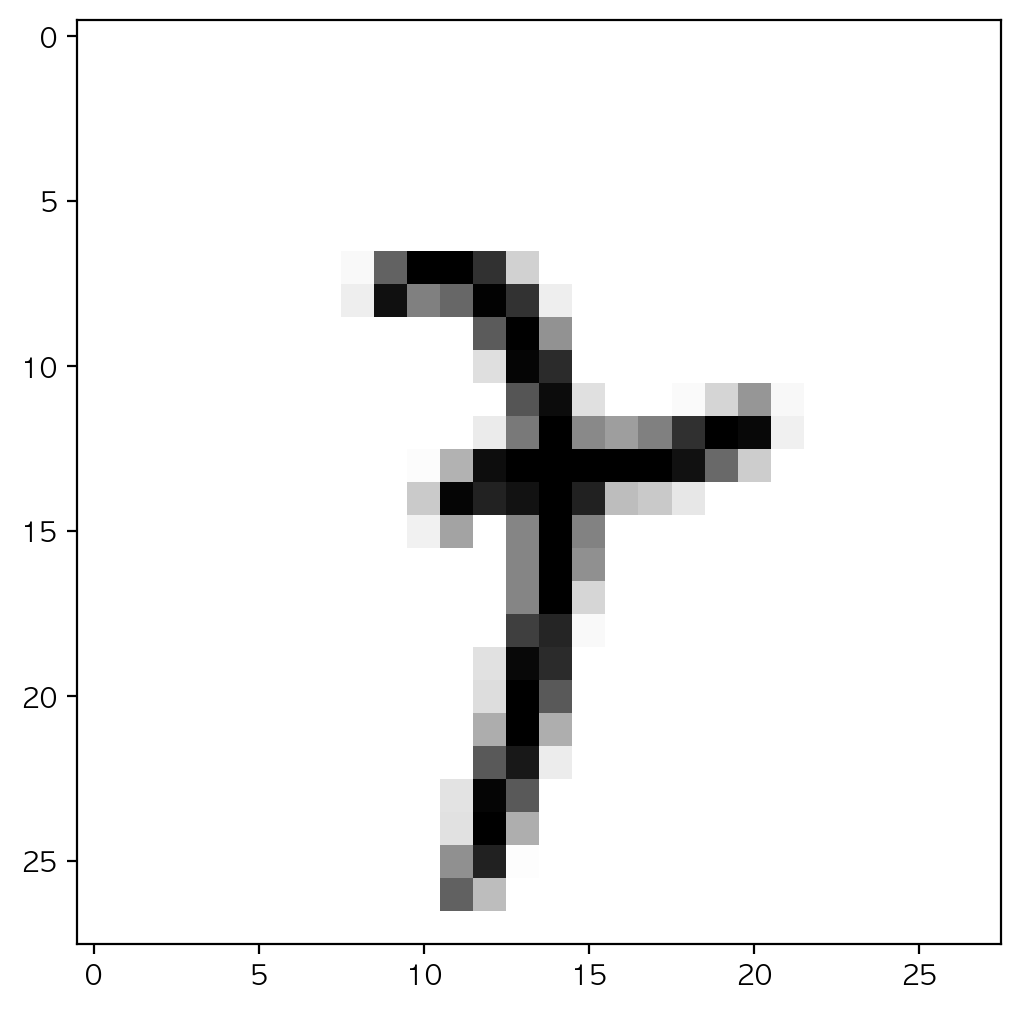

예측확률분포: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
라벨: 7, 예측결과: 2


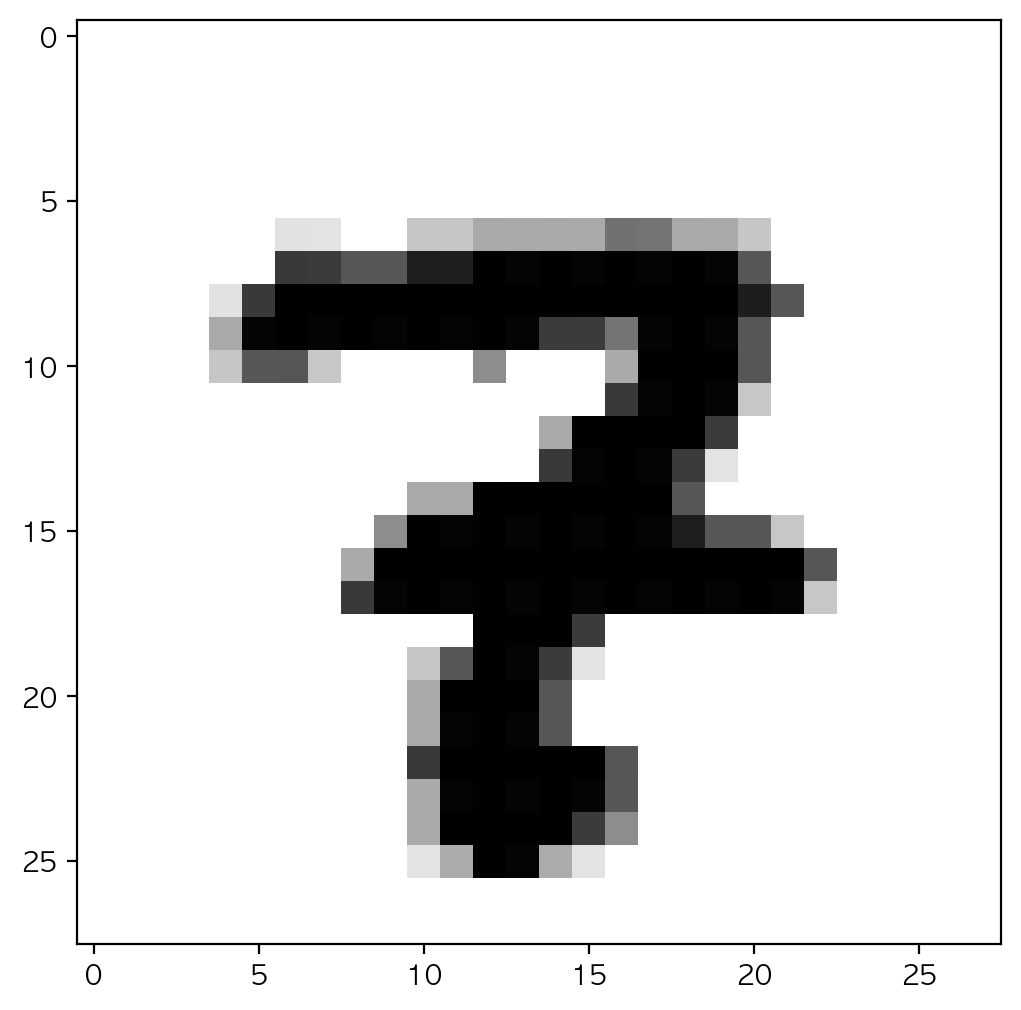

In [31]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## Improving model

In [81]:
from tensorflow.keras import regularizers

# parameters for tuning model
n_channel_1 = 16
n_channel_2 = 32
n_dense = 64
n_train_epoch = 30

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(
    n_channel_1,
    (3, 3),
    activation = 'relu',
    input_shape = (28, 28, 1)
))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(
    n_channel_2,
    (3, 3),
    activation = 'relu'
))
model.add(keras.layers.MaxPooling2D(2, 2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(
    n_dense,
    activation = 'relu',
    kernel_regularizer=regularizers.l1_l2(.001),  # L1 규제와 L2 규제를 추가
))
model.add(keras.layers.Dropout(0.2)) # 드롭아웃 추가
model.add(keras.layers.Dense(
    10,
    activation = 'softmax'
))

model.summary()

# model compile
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# model training
history = model.fit(
    x_train_reshaped,
    y_train,
    validation_data=(x_test_reshaped, y_test),
    epochs=n_train_epoch,
    batch_size = 300,
)

# model evaluation
test_loss, test_accuracy = model.evaluate(
    x_test_reshaped, 
    y_test, 
    verbose=2
)

print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 13, 13, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_27 (Conv2D)          (None, 11, 11, 32)        4640      
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 5, 5, 32)          0         
 ng2D)                                                           
                                                                 
 flatten_12 (Flatten)        (None, 800)               0         
                                                                 
 dense_21 (Dense)            (None, 64)              

In [77]:
print(history.history.keys())
print(history)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


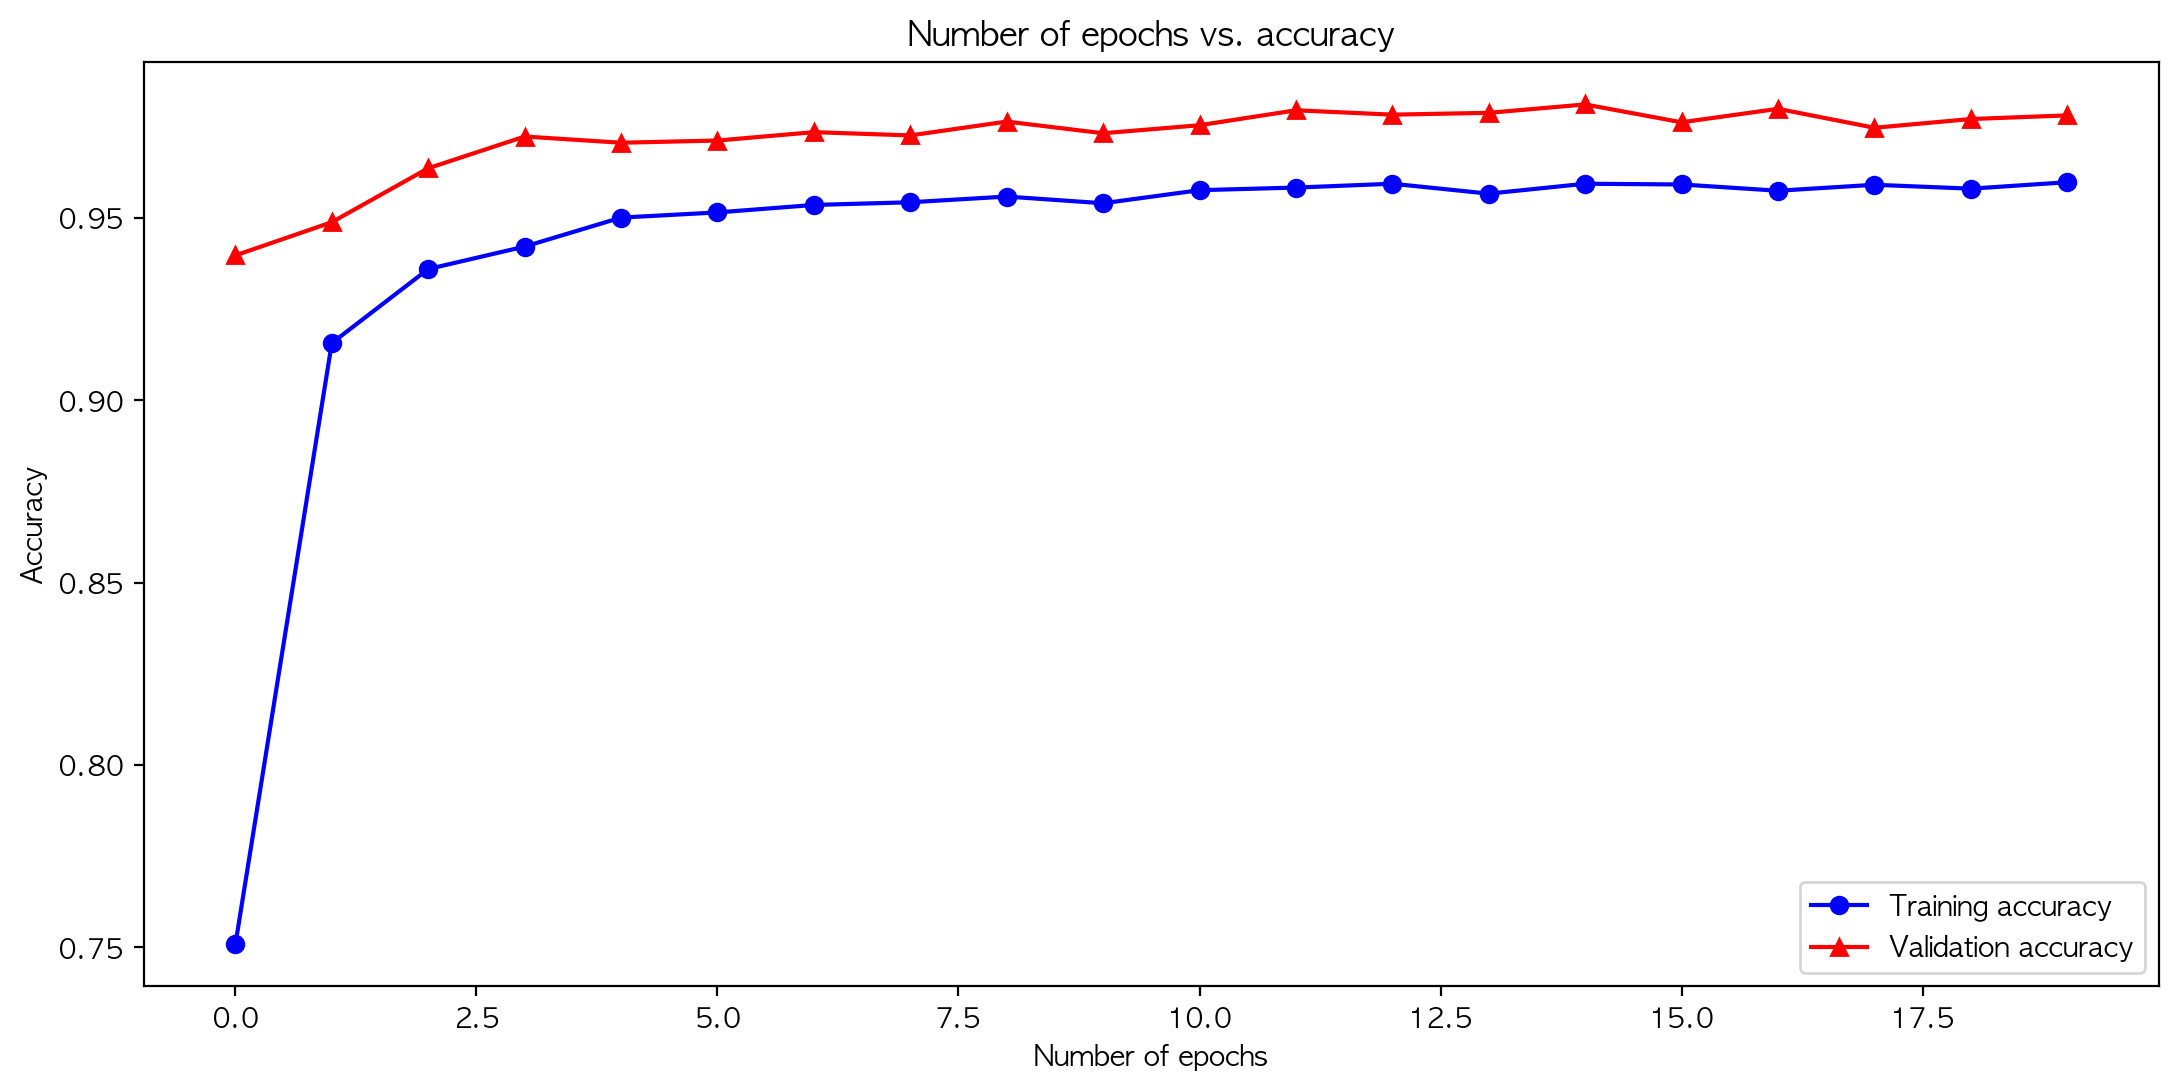

In [78]:
epochs_ = range(0, n_train_epoch)  # number of epochs  
accuracy_train = history.history['accuracy']  ##getting  accuracy of each epochs
accuracy_val = history.history['val_accuracy']  ##getting validation accuracy of each epochs

plt.plot(epochs_, accuracy_train, label='Training accuracy', color='blue', marker = 'o')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

plt.plot(epochs_, accuracy_val, label = "Validation accuracy", color='red', marker = '^')
plt.title("Number of epochs vs. accuracy")
plt.legend()

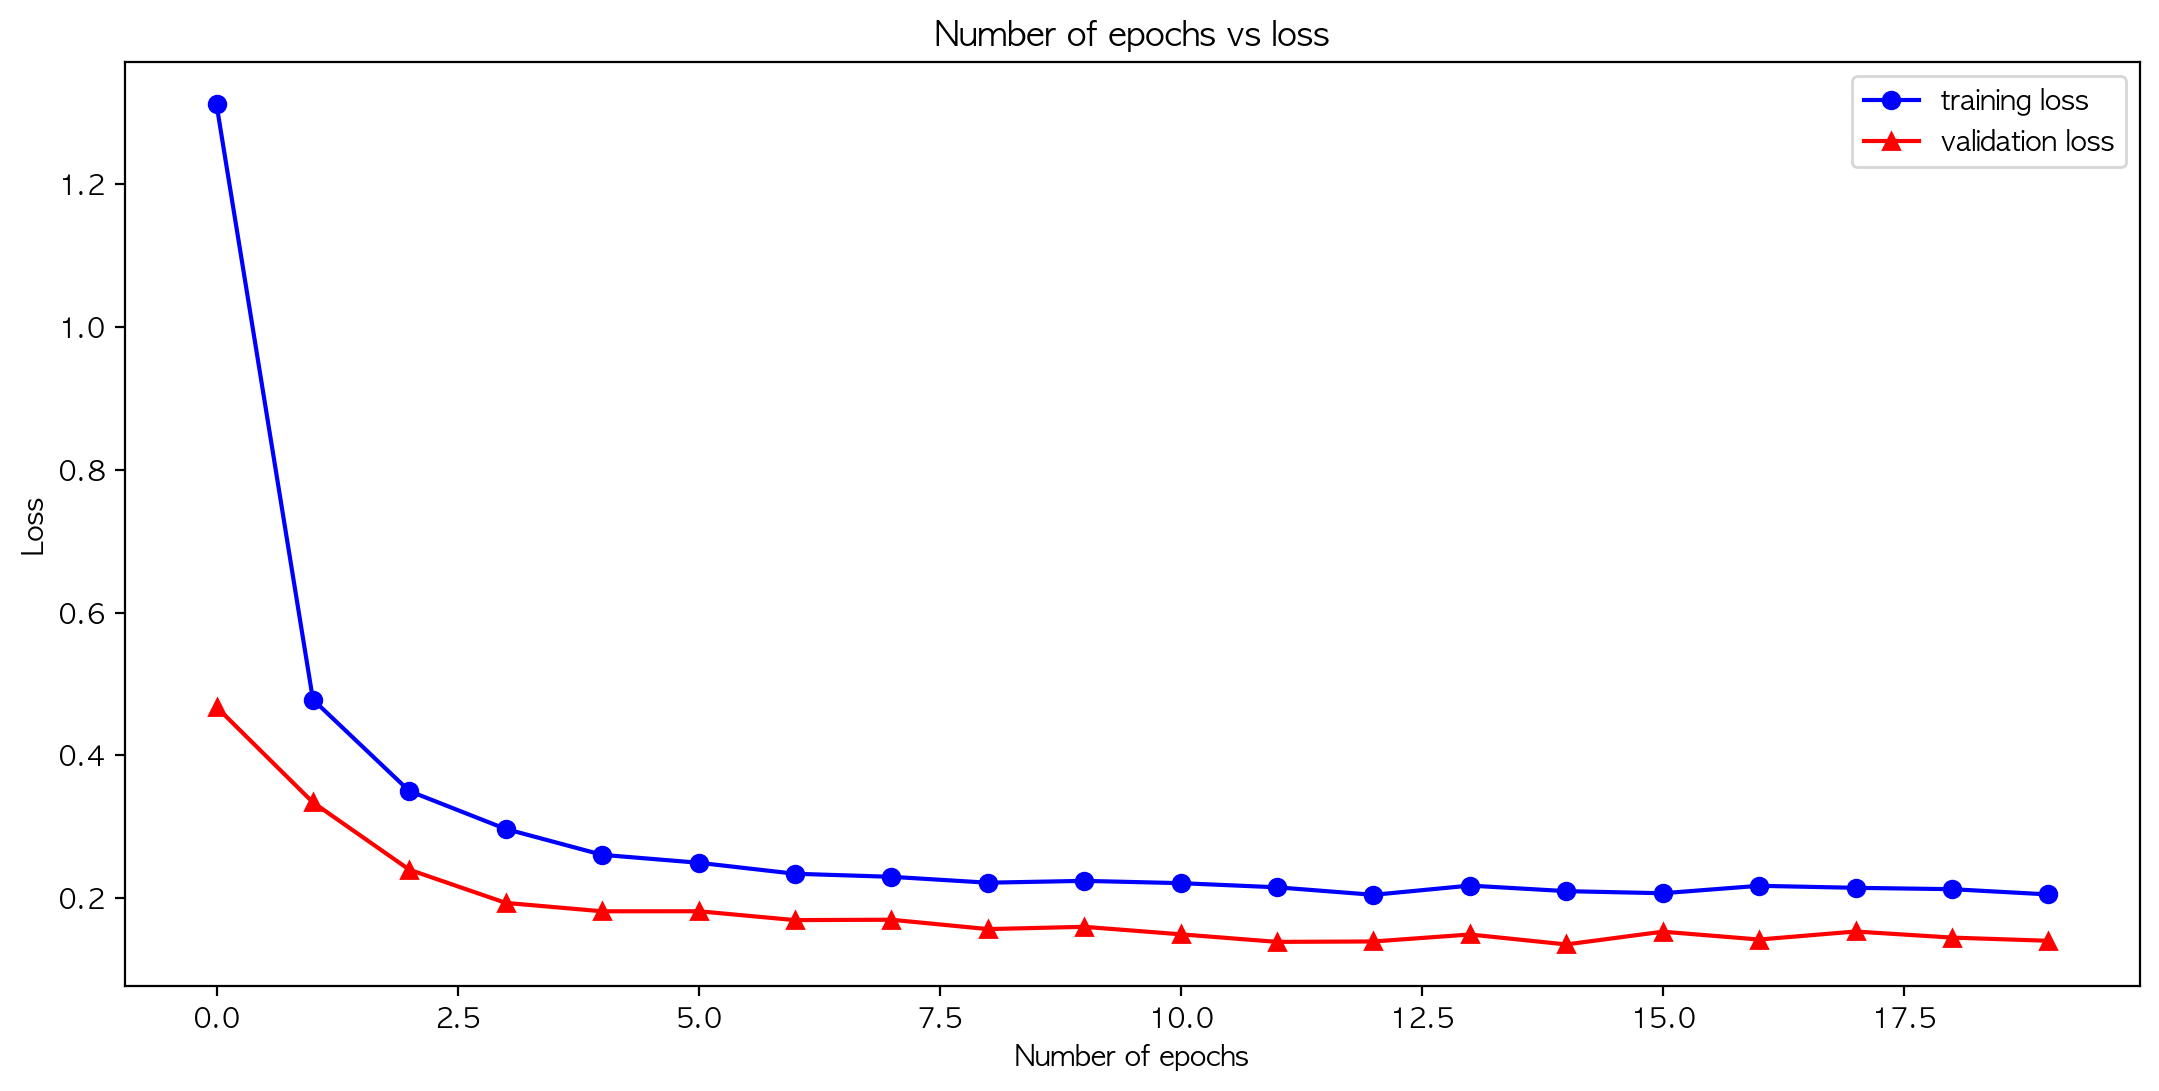

In [79]:
epochs_ = range(0, n_train_epoch)  # number of epochs  
loss_train = history.history['loss']    ##getting  loss of each epochs
loss_val = history.history['val_loss']  ## getting validation loss of each epochs

plt.plot(epochs_, loss_train, label='training loss', color='blue', marker = 'o')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')

plt.plot(epochs_, loss_val, label="validation loss", color='red', marker = '^')
plt.title('Number of epochs vs loss')
plt.legend()